# Group 7 Project: Latent Space Cluster Analysis
<i>Patrick Kay, Kyle Shannon, Ean Vandergraaf</i>

<b>Suggested Activities for Analysis:</b>
* Get a feel for the data by looking at specific frames and the closest other points.
* Clean your data, perhaps moving the beginning and end content of credits.
* Develop hunches and hypotheses about different characters, visual themes, etc.
* Watch or rewatch the movie and/or scour the internet for critical analysis to develop theories.
* Use clustering techniques, such as k-means, to break up scenes or themes
* Develop algorithms or methods for breaking things down scene by scene.
* Consider aggregating scenes as averages.
* Reduce the number of dimensions to explore relationships among.
* Plot timelines that have additional analysis or selective content.
* Interpret the data and analysis through group discussions.

  
<b>Goal to answering these questions:</b>
* <b>Questions about characters</b>: Who are the main characters? When are they featured or absent?
* <b>Semantic themes and motifs</b>: Are there broader themes you can find that repeat across scenes?
* <b>Outliers</b>: Are there scenes that differ greatly compared to most of the rest of the film?
* <b>Clusters</b>: How would you characterize the visual content of the film? Answering this question will likely require both clustering (e.g., k-means, t-SNE) and using your own interpretation on the results of the clustering to make sense of it.
cussions. 
it.

## TODO: Organize the Data

### 1. Take out opening credits

In [27]:
import re
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from IPython.display import Image, display

import json
moive_embeddings = json.load(open("honey_i_shrunk_the_kids_movie_embeddings_1_second.json"))

image_root = 'thumbnails_folder2large/'

embeddings = np.array([vector['embedding'] for vector in moive_embeddings[163:5386]])
#sorted_indexes = np.argsort(embeddings)
print(len(embeddings))
#print(sorted_indexes)

5223


In [21]:
print(embeddings)

[[ 0.53770572  0.73687452  0.07081793 ... -0.31421989 -0.26464015
   0.53975332]
 [ 0.55819106  0.76411217  0.14723182 ... -0.32001424 -0.25347525
   0.56873047]
 [ 0.52313209  0.76891059  0.06612314 ... -0.1874471  -0.24429898
   0.58431041]
 ...
 [ 0.18310213  0.37841895  0.29704794 ... -0.77791536 -0.04703718
  -0.1575821 ]
 [-0.11527532  0.23845083  0.23001286 ... -0.94470543 -0.13168512
   0.29342848]
 [-0.08969384  0.53489888 -0.00270864 ... -0.31092781 -0.76161206
  -0.03025953]]
{'input': 'thumbnail_0001.jpg', 'embedding': [-0.3141614496707916, 0.21892297267913818, 0.10630946606397629, -1.0737407207489014, -0.14155027270317078, 0.10630404204130173, 0.6218047738075256, -0.31840187311172485, 0.13576644659042358, -0.8715311884880066, -0.028382882475852966, -0.7489148378372192, -0.4926939606666565, -0.8100481033325195, -0.03798965364694595, 0.029798194766044617, -0.04123324155807495, -0.14592993259429932, -0.22605234384536743, 0.06170624494552612, 0.1367204487323761, 0.525571584701

### 2. Make clusters along chunks of the timeline

In [28]:
No_chunks = 5
chunk_embeddings = np.array_split(embeddings, No_chunks)
chunk_movie_embeddings = np.array_split(moive_embeddings[163:5386], No_chunks)

print(chunk_embeddings)
#print(chunk_movie_embeddings)

[array([[ 5.37705719e-01,  7.36874521e-01,  7.08179250e-02, ...,
        -3.14219892e-01, -2.64640152e-01,  5.39753318e-01],
       [ 5.58191061e-01,  7.64112175e-01,  1.47231817e-01, ...,
        -3.20014238e-01, -2.53475249e-01,  5.68730474e-01],
       [ 5.23132086e-01,  7.68910587e-01,  6.61231428e-02, ...,
        -1.87447101e-01, -2.44298980e-01,  5.84310412e-01],
       ...,
       [ 6.46631122e-01, -2.35018358e-02, -4.23672199e-02, ...,
        -1.37088835e+00,  1.15125924e-02, -4.86008823e-04],
       [ 7.94122815e-01, -1.32157281e-02,  3.64214540e-01, ...,
        -1.21953809e+00,  1.18878312e-01, -1.91903502e-01],
       [ 4.49674606e-01,  5.52664697e-02,  1.07860804e-01, ...,
        -5.09606823e-02, -3.37897956e-01, -2.30781898e-01]]), array([[ 6.49683535e-01, -1.88620567e-01,  3.06395710e-01, ...,
        -2.69825995e-01, -7.55741596e-01, -9.56634432e-02],
       [ 6.79578066e-01, -1.68799460e-02,  3.10022712e-01, ...,
        -1.72907531e-01, -6.48618460e-01, -4.80689108

### 3. Analyze themes within the clusters

### 4. Try to find ideal numbers of clusters

1.K-Means Clustering



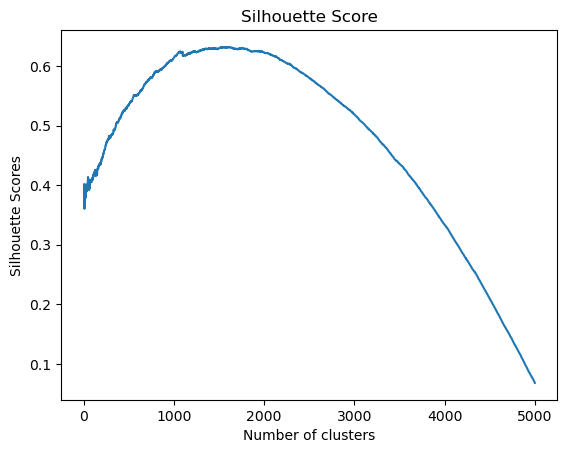

1609
0.631942


In [8]:
tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(embeddings)

print("1.K-Means Clustering\n")
sil_score=[]
maxInd = 0
for i in range(2,5000):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(embedded_vectors)
    kmeans_labels = kmeans.labels_
    
    sil_score.append(silhouette_score(embedded_vectors, kmeans_labels, metric = 'euclidean'))
    if i !=2:
        if sil_score[i-2] >= sil_score[maxInd]:
            maxInd = i-2
    

plt.plot(range(2,5000),sil_score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

print(maxInd)
print(sil_score[maxInd])

Sil Score for 0


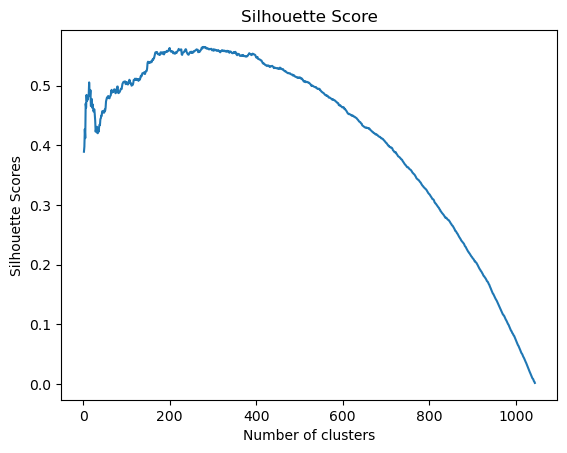

277
0.5646969
Sil Score for 1


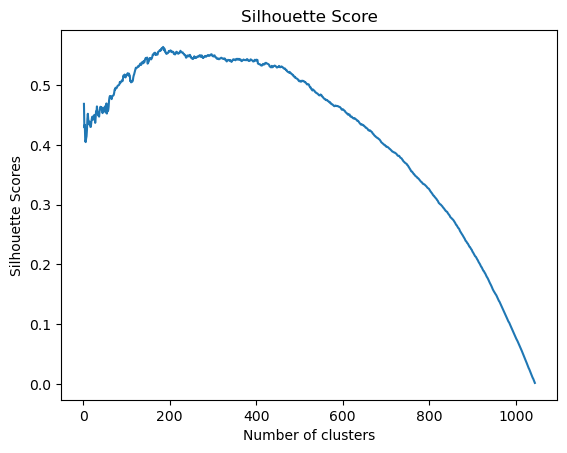

183
0.5636763
Sil Score for 2


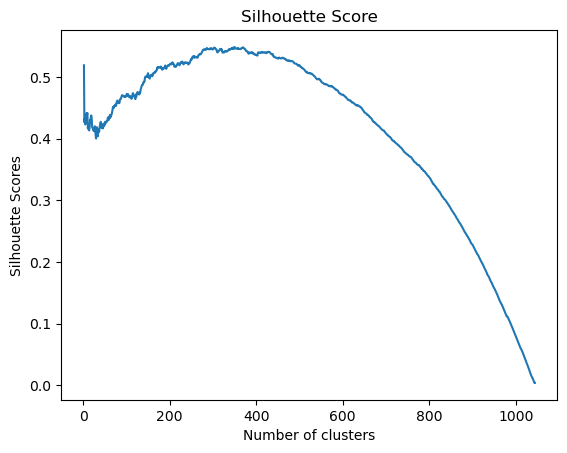

348
0.5484584
Sil Score for 3


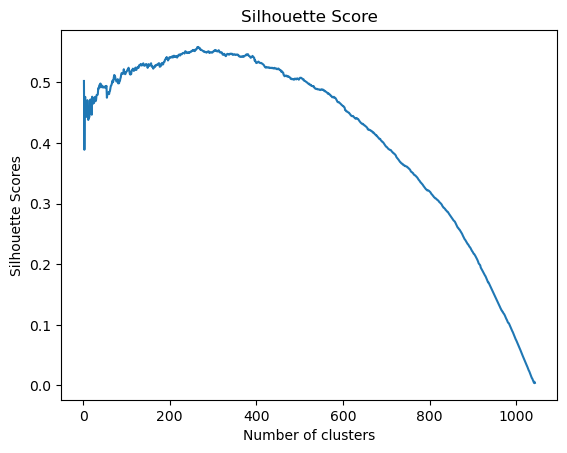

264
0.55856127
Sil Score for 4


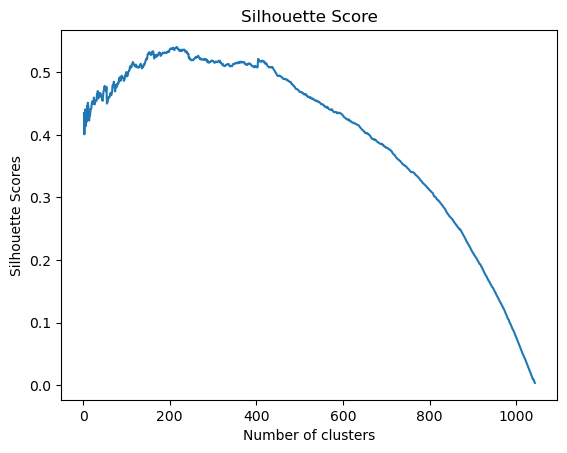

214
0.540805
[277, 183, 348, 264, 214]


In [3]:
tsne = TSNE(n_components=2, random_state=42)
warnings.filterwarnings('ignore')
mx_ind_list = []

for k in range(0, No_chunks):
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])

    print("Sil Score for "+str(k))
    sil_score=[]
    maxInd = 0
    for i in range(2,len(chunk_embeddings[k])):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(chunk_vectors)
        kmeans_labels = kmeans.labels_

        sil_score.append(silhouette_score(chunk_vectors, kmeans_labels, metric = 'euclidean'))
        if i !=2:
            if sil_score[i-2] >= sil_score[maxInd]:
                maxInd = i-2
    mx_ind_list.append(maxInd)


    plt.plot(range(2,len(chunk_embeddings[k])),sil_score)
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.show()

    print(maxInd)
    print(sil_score[maxInd])
print(mx_ind_list)

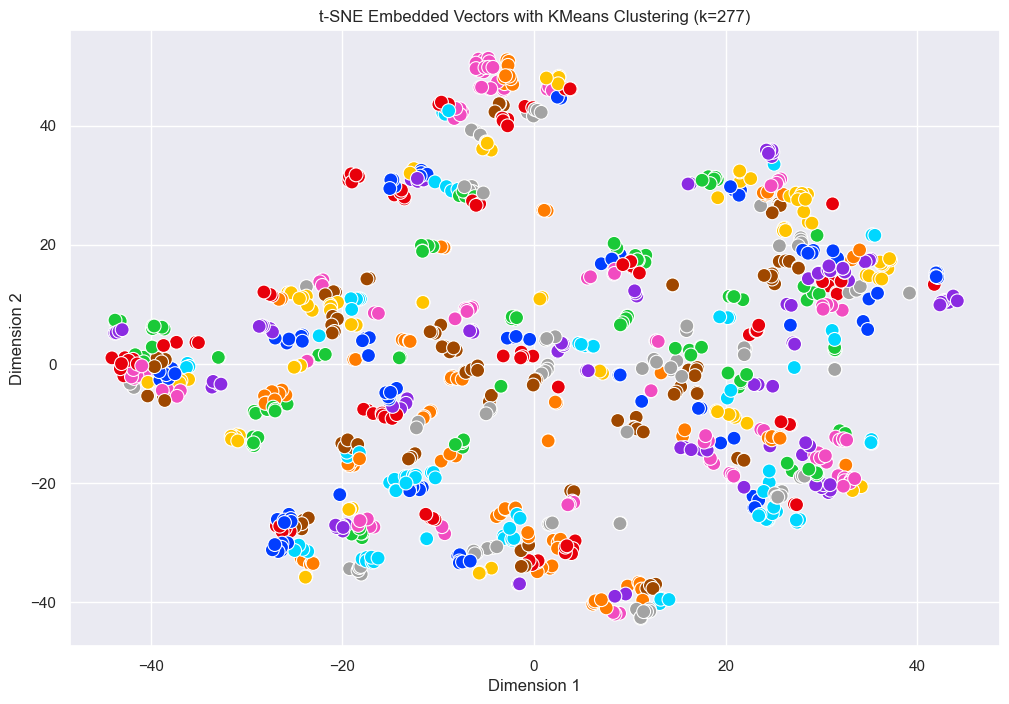

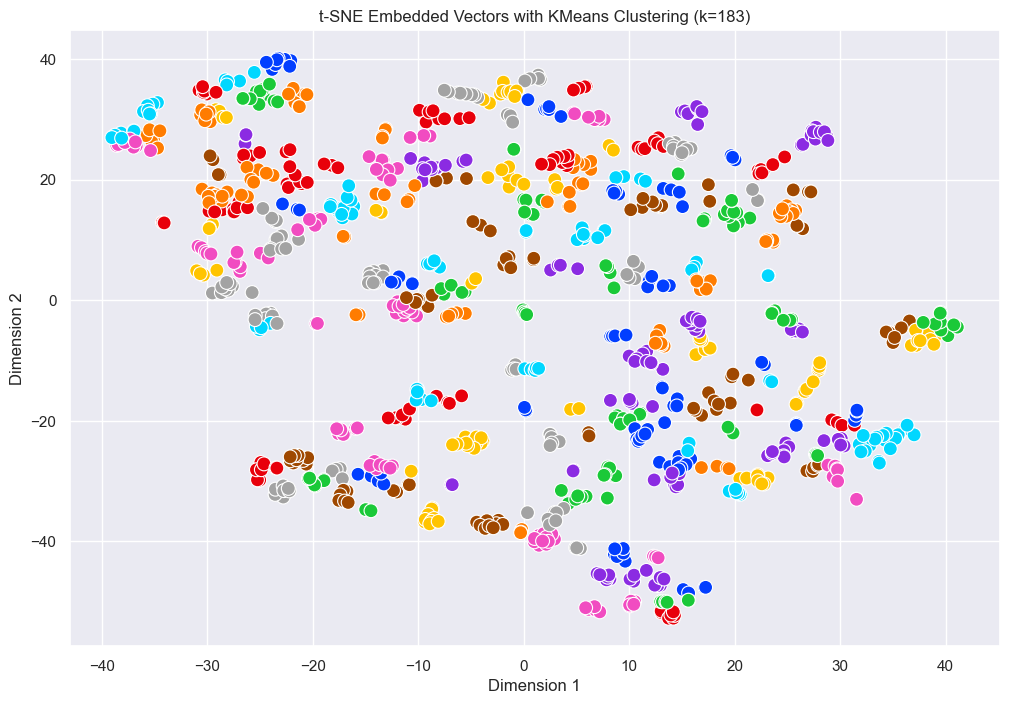

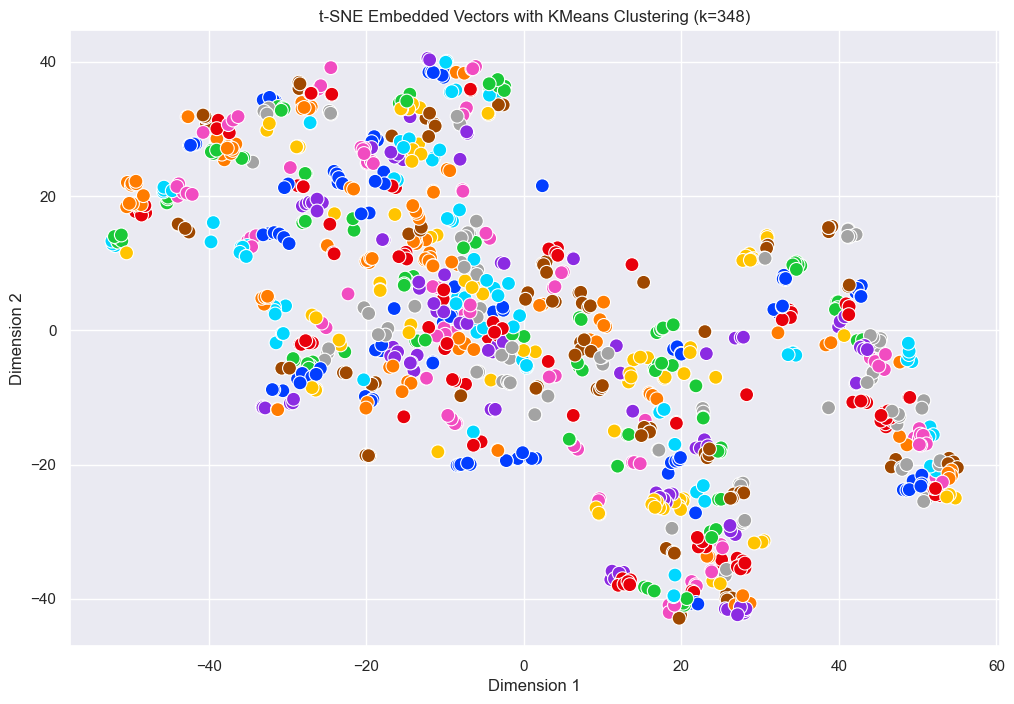

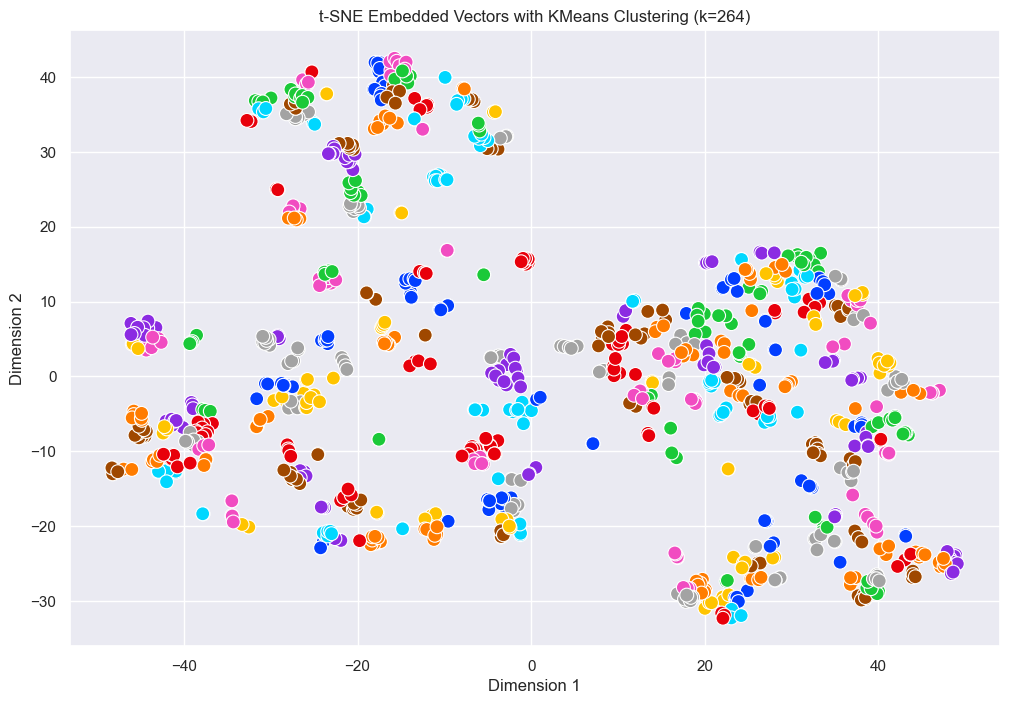

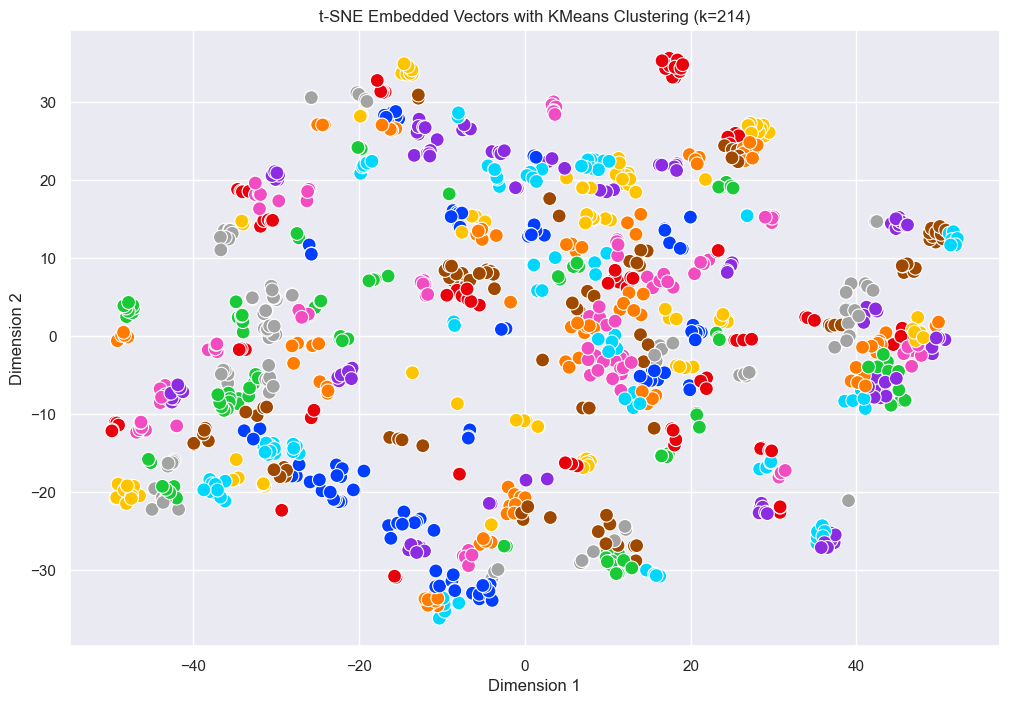

In [35]:
# Using t-SNE to embed the vectors into 2D
sorted_indexes = []
clusters = []

for k in range(0, No_chunks):
    tsne = TSNE(n_components=2, random_state=42)
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])
    sorted_indexes.append(np.argsort(chunk_embeddings[k]))

    # Performing KMeans clustering with k=12
    kmeans = KMeans(n_clusters=mx_ind_list[k], random_state=42)
    clusters.append(kmeans.fit_predict(chunk_vectors))

    # Extracting numbers from file names for labels
    #labels = [re.search(r'\d+', vector['input']).group() for vector in chunk_embeddings[0]]

    # Plotting the embedded vectors with cluster coloring
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=chunk_vectors[:, 0], y=chunk_vectors[:, 1], hue=clusters[k], palette='bright', legend=None, s=100)
    #for i, vec in enumerate(chunk_vectors):
        #plt.text(vec[0] + 0.02, vec[1] + 0.02, labels[i], fontsize=6)  # Adding labels
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('t-SNE Embedded Vectors with KMeans Clustering (k='+str(mx_ind_list[k])+')')
    #plt.legend(title='Cluster')
    plt.show()

In [37]:
cluster_indexes = [[] for _ in range(214)]

# Populate lists with indexes
for i, cluster in enumerate(clusters[4]):
    cluster_indexes[cluster].append(i)
    
for i in range(0,214):
    print("cluster",i,len(cluster_indexes[i]))

cluster 0 2
cluster 1 4
cluster 2 3
cluster 3 5
cluster 4 6
cluster 5 4
cluster 6 2
cluster 7 5
cluster 8 1
cluster 9 3
cluster 10 7
cluster 11 5
cluster 12 11
cluster 13 7
cluster 14 8
cluster 15 4
cluster 16 3
cluster 17 6
cluster 18 4
cluster 19 6
cluster 20 7
cluster 21 5
cluster 22 6
cluster 23 13
cluster 24 3
cluster 25 1
cluster 26 6
cluster 27 7
cluster 28 6
cluster 29 9
cluster 30 7
cluster 31 8
cluster 32 3
cluster 33 3
cluster 34 4
cluster 35 2
cluster 36 6
cluster 37 8
cluster 38 7
cluster 39 6
cluster 40 9
cluster 41 8
cluster 42 6
cluster 43 3
cluster 44 2
cluster 45 5
cluster 46 5
cluster 47 2
cluster 48 11
cluster 49 3
cluster 50 6
cluster 51 4
cluster 52 5
cluster 53 3
cluster 54 6
cluster 55 6
cluster 56 6
cluster 57 5
cluster 58 5
cluster 59 10
cluster 60 4
cluster 61 4
cluster 62 5
cluster 63 3
cluster 64 10
cluster 65 7
cluster 66 6
cluster 67 4
cluster 68 2
cluster 69 5
cluster 70 3
cluster 71 2
cluster 72 6
cluster 73 3
cluster 74 6
cluster 75 6
cluster 76 6
clus

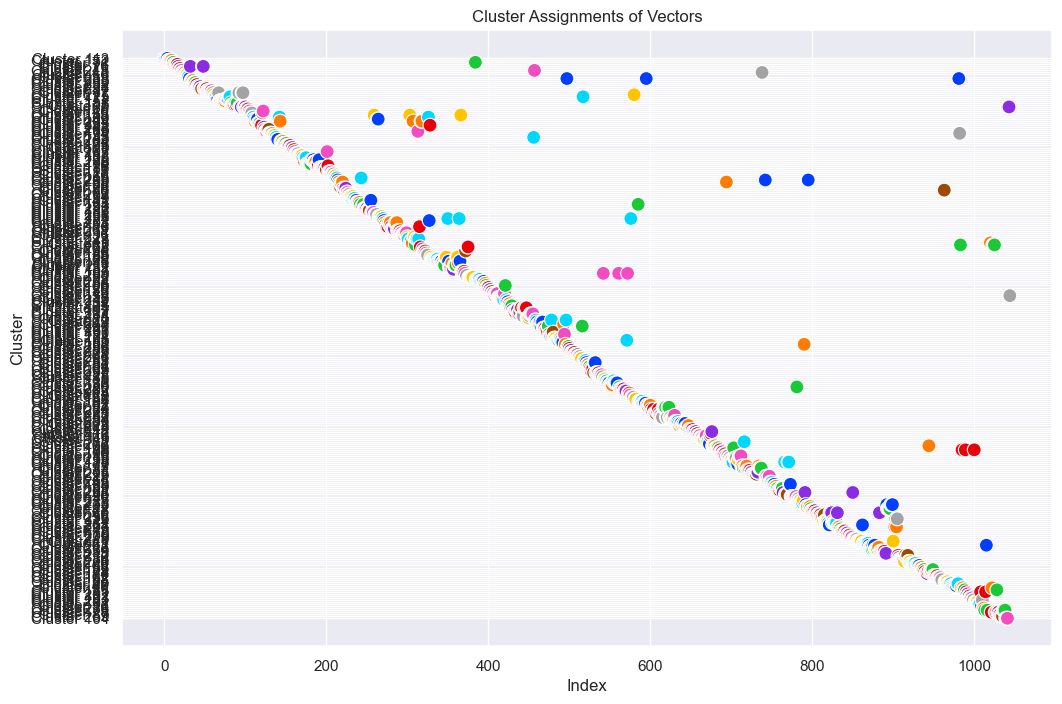

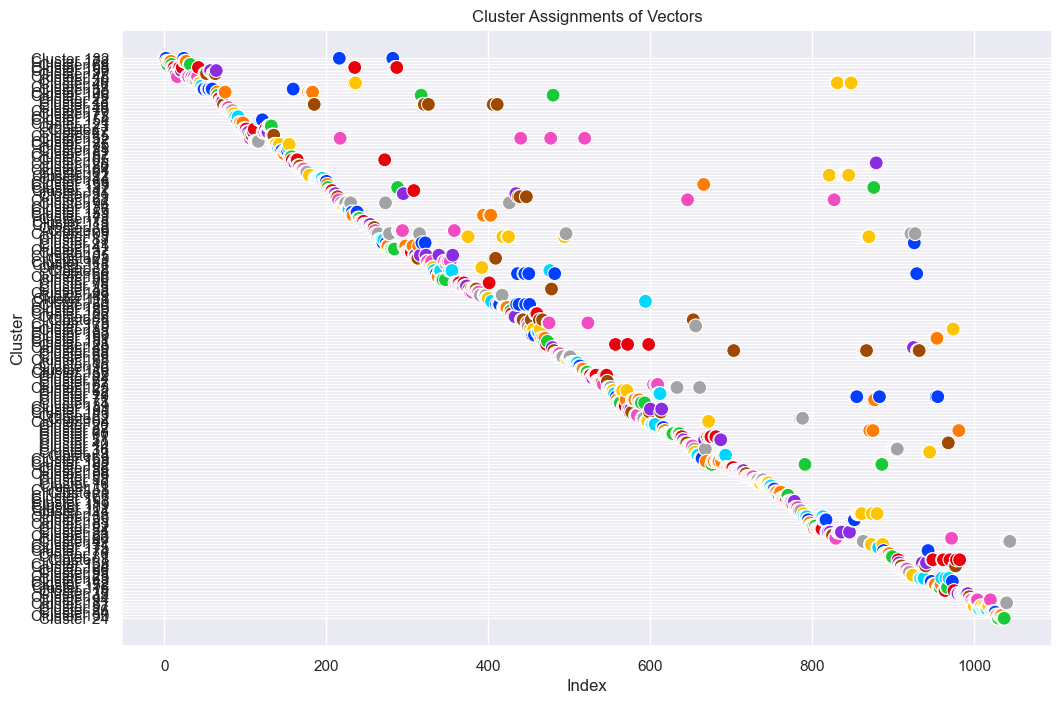

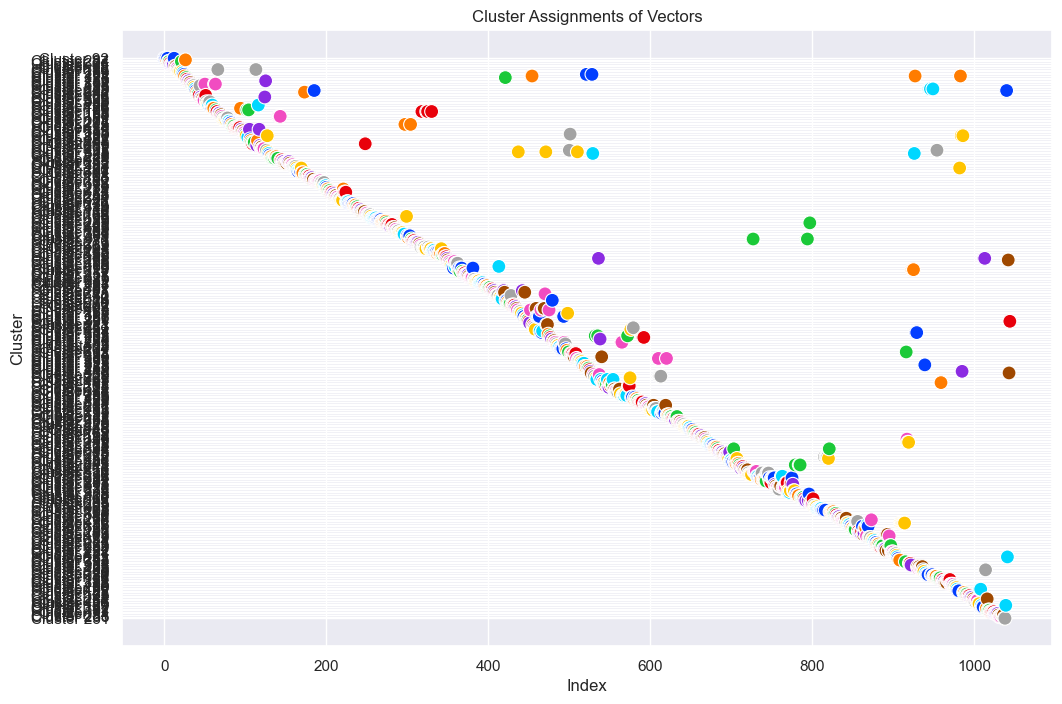

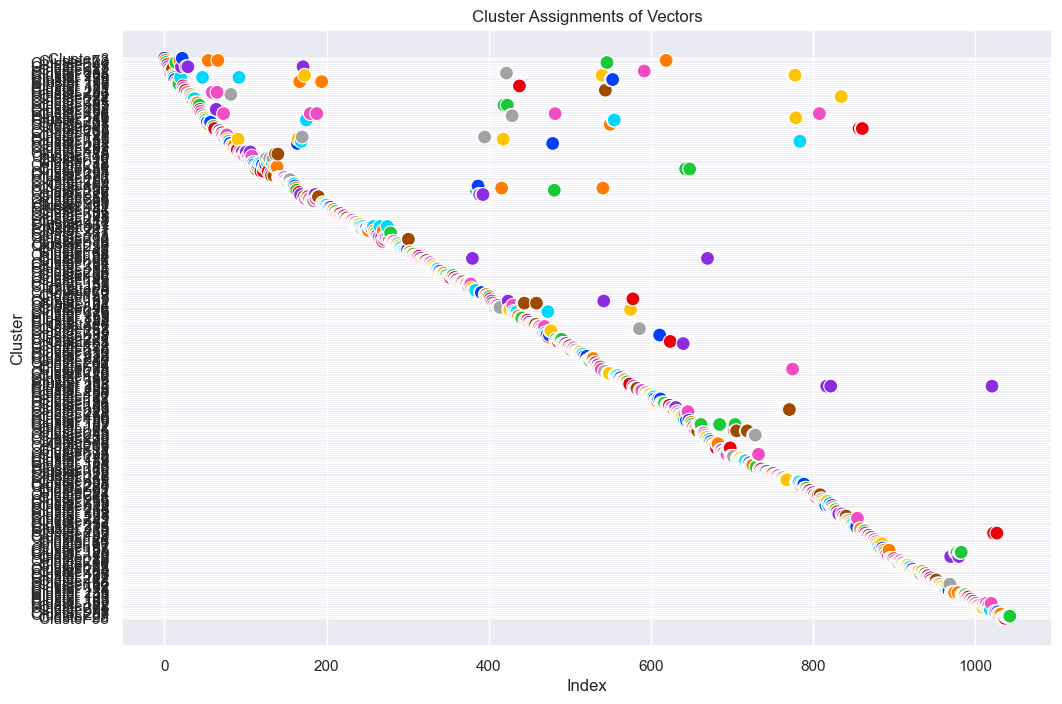

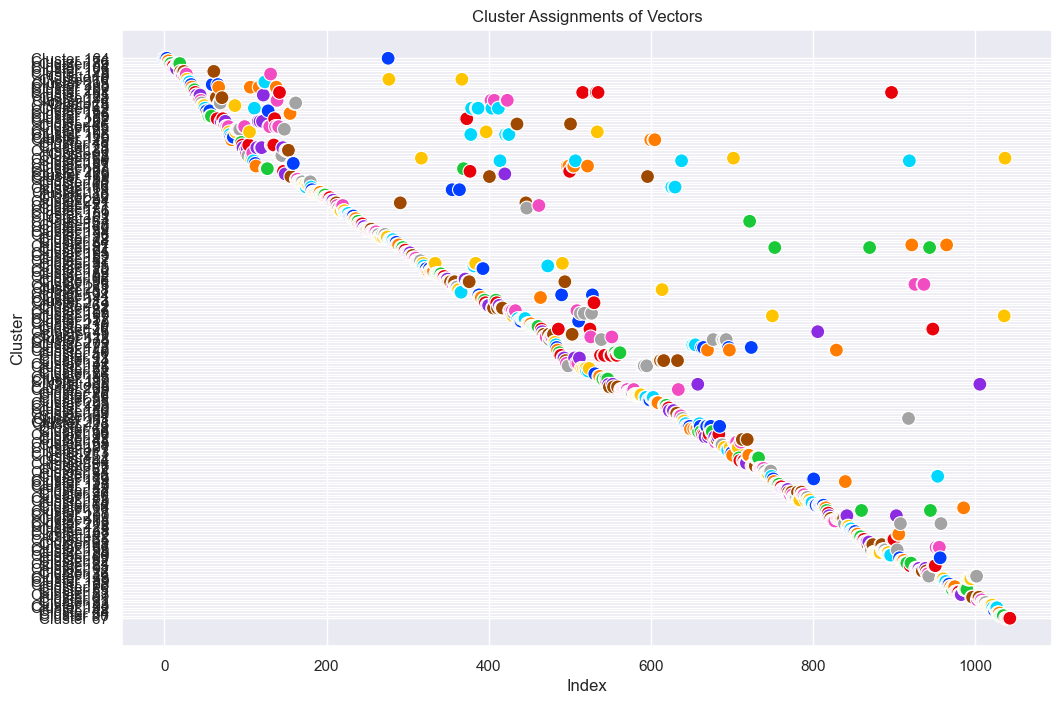

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the state from the previous code

# Create a list of cluster assignments for each vector
for k in range(0, No_chunks):
    cluster_labels = [f'Cluster {cluster + 1}' for cluster in clusters[k]]

    # Plotting the scatter plot
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=np.arange(len(chunk_embeddings[k])), y=cluster_labels, hue=cluster_labels, palette='bright', legend=None, s=100)
    plt.xlabel('Index')
    plt.ylabel('Cluster')
    plt.title('Cluster Assignments of Vectors')
    #plt.legend(title='Cluster')
    plt.show()

In [9]:
print(chunk_embeddings[0])

[[ 5.37705719e-01  7.36874521e-01  7.08179250e-02 ... -3.14219892e-01
  -2.64640152e-01  5.39753318e-01]
 [ 5.58191061e-01  7.64112175e-01  1.47231817e-01 ... -3.20014238e-01
  -2.53475249e-01  5.68730474e-01]
 [ 5.23132086e-01  7.68910587e-01  6.61231428e-02 ... -1.87447101e-01
  -2.44298980e-01  5.84310412e-01]
 ...
 [ 6.46631122e-01 -2.35018358e-02 -4.23672199e-02 ... -1.37088835e+00
   1.15125924e-02 -4.86008823e-04]
 [ 7.94122815e-01 -1.32157281e-02  3.64214540e-01 ... -1.21953809e+00
   1.18878312e-01 -1.91903502e-01]
 [ 4.49674606e-01  5.52664697e-02  1.07860804e-01 ... -5.09606823e-02
  -3.37897956e-01 -2.30781898e-01]]


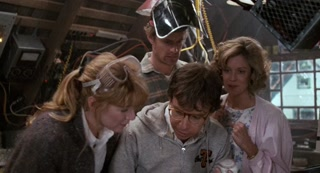

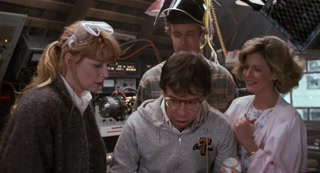

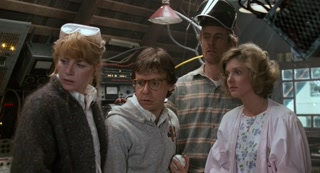

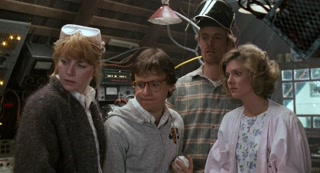

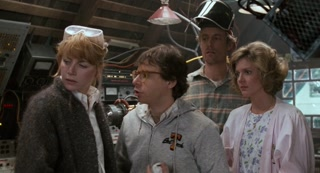

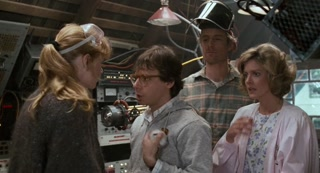

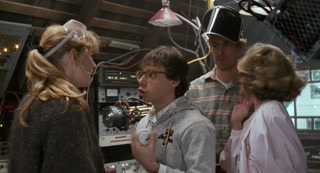

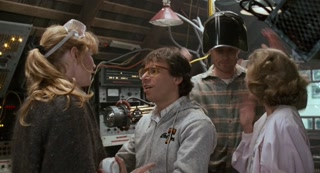

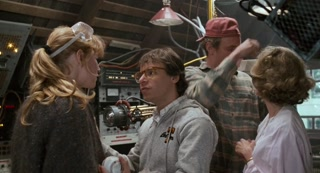

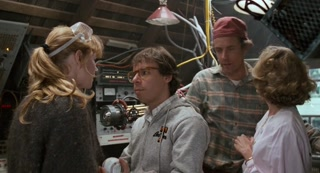

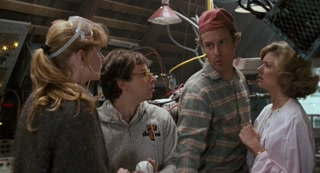

In [39]:
show_list = [1234,5049,786]
for i in cluster_indexes[12]:
    #print(embeddings[i])
    #print(i,sorted_indexes[0][i],chunk_movie_embeddings[0][i]["input"])
    image_path = image_root+chunk_movie_embeddings[4][i]["input"]
    # Display the image
    display(Image(filename=image_path))

# Film Description
<i>This section should cite and briefly describe the film.</i>

# Methods Summary
<i>This section should highlight methods you used in your exploratory analysis. You should include at least one clustering technique or develop another way to relate frames to other frames. you should also consider dimensionality reduction. 

# Hunches and Hypotheses
<i>This section should summarize the question that you asked about teh film taht could potentially be answered by exploratory analysis. You should ask at least three questions.</i>

<u>Q1. Do most of the clusters have something to do with the kids?</u>

<u>Q2. That machines/tech is fairly common in the clusters?</u>

<u> Q3. One character appears more than any other</u>

# Results and Interpretations

<i>This section should include a summary of your findings. Describe the extent and results of your goal in answering questions.</i>

# Reflection
<i>Reflect on your process of analysis. What worked well and did not work well? Describe the limitations of the work and describe what you would work on with more time.</i>